In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 50

In [3]:
database_path ="Dataset\sqlite-sakila.db"

In [4]:
connection = sqlite3.connect(database_path)

In [5]:
# Tables in database
tables = pd.read_sql("""
SELECT *
FROM sqlite_master
WHERE type = 'table';
""",connection
)

tables

,type,name,tbl_name,rootpage,sql
0,table,actor,actor,2,CREATE TABLE actor (\n actor_id numeric NOT N...
1,table,country,country,5,CREATE TABLE country (\n country_id SMALLINT ...
2,table,city,city,7,"CREATE TABLE city (\n city_id int NOT NULL,\n..."
3,table,address,address,10,CREATE TABLE address (\n address_id int NOT N...
4,table,language,language,13,CREATE TABLE language (\n language_id SMALLIN...
5,table,category,category,15,CREATE TABLE category (\n category_id SMALLIN...
6,table,customer,customer,19,CREATE TABLE customer (\n customer_id INT NOT...
7,table,film,film,24,"CREATE TABLE film (\n film_id int NOT NULL,\n..."
8,table,film_actor,film_actor,28,CREATE TABLE film_actor (\n actor_id INT NOT ...
9,table,film_category,film_category,33,CREATE TABLE film_category (\n film_id INT NO...


In [6]:
# Film Table
pd.read_sql("""
SELECT *
FROM actor;
""", connection
)

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2,NICK,WAHLBERG,2021-03-06 15:51:59
2,3,ED,CHASE,2021-03-06 15:51:59
3,4,JENNIFER,DAVIS,2021-03-06 15:51:59
4,5,JOHNNY,LOLLOBRIGIDA,2021-03-06 15:51:59
...,...,...,...,...
195,196,BELA,WALKEN,2021-03-06 15:52:00
196,197,REESE,WEST,2021-03-06 15:52:00
197,198,MARY,KEITEL,2021-03-06 15:52:00
198,199,JULIA,FAWCETT,2021-03-06 15:52:00


In [7]:
# Actor Table
pd.read_sql("""
SELECT *
FROM film;
""", connection
)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2021-03-06 15:52:08
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,None,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2021-03-06 15:52:08
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,None,6,0.99,105,10.99,NC-17,Deleted Scenes,2021-03-06 15:52:08
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,None,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:08


In [8]:
pd.read_sql("""
SELECT
    payment_id
    ,payment_date
    ,amount
FROM payment;
""", connection
)

,payment_id,payment_date,amount
0,1,2005-05-25 11:30:37.000,2.99
1,2,2005-05-28 10:35:23.000,0.99
2,3,2005-06-15 00:54:12.000,5.99
3,4,2005-06-15 18:02:53.000,0.99
4,5,2005-06-15 21:08:46.000,9.99
...,...,...,...
16044,16045,2005-08-21 17:43:42.000,4.99
16045,16046,2005-08-21 21:41:57.000,1.99
16046,16047,2005-08-23 06:09:44.000,8.99
16047,16048,2005-08-23 11:08:46.000,2.99


In [9]:
# Count how many payments
pd.read_sql("""

SELECT COUNT(*)
FROM payment;
""", connection)

,COUNT(*)
0,16049


In [10]:
# Count how many payments when rental_id is not null
pd.read_sql("""
SELECT COUNT(rental_id)
From payment;
""", connection
)

,COUNT(rental_id)
0,16044


In [11]:
# Paymnets with rental_id is null
pd.read_sql("""
SELECT *
FROM payment
WHERE rental_id IS NULL
""", connection
)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,424,16,1,None,1.99,2005-06-18 04:56:12.000,2021-03-06 15:56:00
1,7011,259,2,None,1.99,2005-08-23 06:13:16.000,2021-03-06 15:56:55
2,10840,401,1,None,0.99,2005-07-12 06:26:10.000,2021-03-06 15:57:27
3,14675,546,1,None,3.99,2005-07-30 21:16:20.000,2021-03-06 15:57:58
4,15458,577,2,None,0.99,2005-05-27 00:46:39.000,2021-03-06 15:58:04


In [12]:
pd.read_sql("""
SELECT
    rating
    ,MIN(length)
    ,MAX(length)
FROM film
WHERE rating ='PG';
""", connection
)

,rating,MIN(length),MAX(length)
0,PG,46,185


In [13]:
pd.read_sql("""
SELECT
    rating
    ,MIN(length)
    ,MAX(length)
    ,ROUND(AVG(length), 0) AS Average
FROM film
GROUP BY rating
""", connection
)

,rating,MIN(length),MAX(length),Average
0,G,47,185,111.0
1,NC-17,46,184,113.0
2,PG,46,185,112.0
3,PG-13,46,185,120.0
4,R,49,185,119.0


In [14]:
films_per_rating = pd.read_sql("""
SELECT
    rating AS Rating
    ,COUNT(title) AS Count
FROM film
GROUP BY rating
ORDER BY Count Desc
""", connection
)

films_per_rating

,Rating,Count
0,PG-13,223
1,NC-17,210
2,R,195
3,PG,194
4,G,178


In [15]:
# Save queries to csv for visualization using tableau
films_per_rating.to_csv('CSV/films_per_rating.csv')

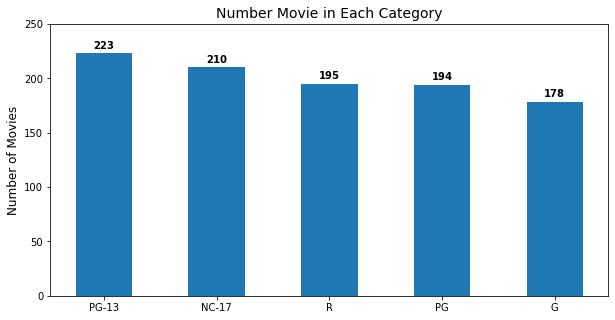

In [16]:
fig, ax = plt.subplots(figsize = (10,5))

ypos = np.arange(len(films_per_rating["Count"]))
bars = ax.bar(ypos, films_per_rating["Count"], width = 0.50)
ax.set_xticks(ypos)
ax.set_xticklabels(films_per_rating["Rating"])
ax.set_ylim(ymax=250)
ax.set_title("Number Movie in Each Category", fontsize = 14)
ax.set_ylabel("Number of Movies", fontsize = 12)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext =(0,3),
                    textcoords="offset points",
                    ha="center", va="bottom",
                    fontweight="semibold")
plt.show()

In [17]:
# Number of movies in each category held in inventory
films_in_inv = pd.read_sql("""
SELECT
    rating AS Rating
    ,COUNT(title) AS Count
FROM inventory AS i
JOIN film as f
ON i.film_id = f.film_id
GROUP BY Rating
ORDER BY Count DESC
""", connection
)

films_in_inv

,Rating,Count
0,PG-13,1018
1,NC-17,944
2,PG,924
3,R,904
4,G,791


In [18]:
films_in_inv.to_csv('CSV/films_in_inv.csv')

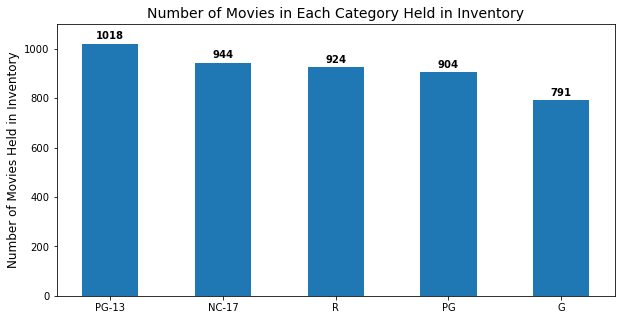

In [19]:
fig, ax = plt.subplots(figsize = (10,5))

ypos = np.arange(len(films_in_inv["Count"]))
bars = ax.bar(ypos, films_in_inv["Count"], width = 0.50)
ax.set_xticks(ypos)
ax.set_xticklabels(films_per_rating["Rating"])
ax.set_ylim(ymax=1100)
ax.set_title("Number of Movies in Each Category Held in Inventory", fontsize = 14)
ax.set_ylabel("Number of Movies Held in Inventory", fontsize = 12)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext =(0,3),
                    textcoords="offset points",
                    ha="center", va="bottom",
                    fontweight="semibold")
plt.show()

In [20]:
# Find mmovies in inventory when rating is PG
pd.read_sql("""
SELECT
    f.title AS Title
    ,COUNT(*) AS Count
    ,f.rating
FROM inventory AS i
JOIN film AS f
ON i.film_id = f.film_id
WHERE Rating = 'PG'
GROUP BY f.title
ORDER BY Count DESC, Title ASC;

""", connection
)

,Title,Count,rating
0,ACADEMY DINOSAUR,8,PG
1,BOUND CHEAPER,8,PG
2,BUCKET BROTHERHOOD,8,PG
3,EXPENDABLE STALLION,8,PG
4,FROST HEAD,8,PG
...,...,...,...
178,PRIVATE DROP,2,PG
179,PUNK DIVORCE,2,PG
180,RECORDS ZORRO,2,PG
181,TEQUILA PAST,2,PG


In [21]:
pd.read_sql("""
SELECT *
FROM inventory
""", connection
)

,inventory_id,film_id,store_id,last_update
0,1,1,1,2021-03-06 15:52:08
1,2,1,1,2021-03-06 15:52:08
2,3,1,1,2021-03-06 15:52:08
3,4,1,1,2021-03-06 15:52:08
4,5,1,2,2021-03-06 15:52:08
...,...,...,...,...
4576,4577,1000,1,2021-03-06 15:52:45
4577,4578,1000,2,2021-03-06 15:52:45
4578,4579,1000,2,2021-03-06 15:52:45
4579,4580,1000,2,2021-03-06 15:52:45


In [22]:
pd.read_sql("""
SELECT *
FROM film_actor
LIMIT 5;
""", connection
)

,actor_id,film_id,last_update
0,1,1,2021-03-06 15:52:45
1,1,23,2021-03-06 15:52:45
2,1,25,2021-03-06 15:52:45
3,1,106,2021-03-06 15:52:45
4,1,140,2021-03-06 15:52:45


In [23]:
# Find actors in each movies
pd.read_sql("""
SELECT
    f.title AS FilmTitle
    ,a.first_name ||' '|| a.last_name AS Name
FROM film_actor AS fa
JOIN film AS f
ON fa.film_id = f.film_id
JOIN actor AS a
ON fa.actor_id = a.actor_id
""", connection
)

,FilmTitle,Name
0,ACADEMY DINOSAUR,PENELOPE GUINESS
1,ANACONDA CONFESSIONS,PENELOPE GUINESS
2,ANGELS LIFE,PENELOPE GUINESS
3,BULWORTH COMMANDMENTS,PENELOPE GUINESS
4,CHEAPER CLYDE,PENELOPE GUINESS
...,...,...
5457,TELEGRAPH VOYAGE,THORA TEMPLE
5458,TROJAN TOMORROW,THORA TEMPLE
5459,VIRGINIAN PLUTO,THORA TEMPLE
5460,WARDROBE PHANTOM,THORA TEMPLE


In [24]:
# Actors with the number of movies they have starred
pd.read_sql("""
SELECT
    a.first_name ||' '|| a.last_name AS Name
    ,COUNT(f.title) AS Performance
FROM film_actor AS fa
JOIN film as f
ON fa.film_id = f.film_id
JOIN actor as a
ON fa.actor_id = a.actor_id
GROUP BY f.title
HAVING Performance > 10
ORDER BY Performance DESC, Name ASC
""", connection
)

,Name,Performance
0,WOODY HOFFMAN,15
1,ED CHASE,13
2,HELEN VOIGHT,13
3,JENNIFER DAVIS,13
4,JOHNNY LOLLOBRIGIDA,13
5,NICK WAHLBERG,13
6,SISSY SOBIESKI,13
7,BETTE NICHOLSON,12
8,BETTE NICHOLSON,12
9,ELVIS MARX,12


In [25]:
pd.read_sql("""
SELECT
    r.rental_id AS Rental_ID
    ,f.title AS Title
    ,strftime('%Y-%m-%d', r.rental_date) AS Rent
    ,strftime('%Y-%m-%d', r.return_date) AS Return
    ,ROUND(JULIANDAY(r.return_date) - JULIANDAY(r.rental_date), 2) AS Hold_Period
    ,f.rental_duration AS Rental_Duration
FROM rental AS r
JOIN inventory AS i
ON r.inventory_id = i.inventory_id
JOIN film AS f
ON i.film_id = f.film_id
WHERE r.return_date IS NOT NULL;
""", connection
)

,Rental_ID,Title,Rent,Return,Hold_Period,Rental_Duration
0,1,BLANKET BEVERLY,2005-05-24,2005-05-26,1.97,7
1,2,FREAKY POCUS,2005-05-24,2005-05-28,3.87,7
2,3,GRADUATE LORD,2005-05-24,2005-06-01,7.96,7
3,4,LOVE SUICIDES,2005-05-24,2005-06-03,9.11,6
4,5,IDOLS SNATCHERS,2005-05-24,2005-06-02,8.23,5
...,...,...,...,...,...,...
15856,16045,COMANCHEROS ENEMY,2005-08-23,2005-08-25,2.06,5
15857,16046,VOYAGE LEGALLY,2005-08-23,2005-08-27,3.82,6
15858,16047,ILLUSION AMELIE,2005-08-23,2005-08-25,1.17,4
15859,16048,HUNCHBACK IMPOSSIBLE,2005-08-23,2005-08-31,7.95,4


In [26]:
# Overdue rentals
pd.read_sql("""
SELECT
    r.rental_id AS Rental_ID
    ,c.last_name || ', '|| c.first_name AS Name
    ,c.email
    ,f.title AS Film
    ,ROUND(JULIANDAY(r.return_date) - JULIANDAY(r.rental_date),2) - f.rental_duration AS Overdue_Days
FROM rental AS r
JOIN inventory AS i
ON r.inventory_id = i.inventory_id
JOIN film AS f
ON i.film_id = f.film_id
JOIN customer AS c ON r.customer_id = c.customer_id
WHERE r.return_date IS NOT NULL
AND Overdue_Days >0;
""", connection
)

,Rental_ID,Name,email,Film,Overdue_Days
0,3,"MURRELL, MANUEL",MANUEL.MURRELL@sakilacustomer.org,GRADUATE LORD,0.96
1,4,"PURDY, ANDREW",ANDREW.PURDY@sakilacustomer.org,LOVE SUICIDES,3.11
2,5,"HANSEN, DELORES",DELORES.HANSEN@sakilacustomer.org,IDOLS SNATCHERS,3.23
3,7,"WALTERS, CASSANDRA",CASSANDRA.WALTERS@sakilacustomer.org,SWARM GOLD,0.89
4,10,"ISOM, DANNY",DANNY.ISOM@sakilacustomer.org,HANGING DEEP,1.95
...,...,...,...,...,...
8101,16039,"WOOD, LORI",LORI.WOOD@sakilacustomer.org,CAPER MOTIONS,1.90
8102,16040,"SIMS, VANESSA",VANESSA.SIMS@sakilacustomer.org,SCORPION APOLLO,6.17
8103,16043,"SEAL, KARL",KARL.SEAL@sakilacustomer.org,STING PERSONAL,4.20
8104,16048,"HAMILTON, GLADYS",GLADYS.HAMILTON@sakilacustomer.org,HUNCHBACK IMPOSSIBLE,3.95


In [27]:
# Costumers with most overdue rentals
pd.read_sql("""
SELECT
    c.customer_id AS Customer_ID
    ,c.last_name ||' ' || c.first_name AS Name
    ,c.email
    ,COUNT(*) AS Overdue_Count
FROM rental AS r
JOIN inventory AS i 
ON r.inventory_id = i.inventory_id
JOIN film AS f
ON i.film_id = f.film_id
JOIN customer AS c
ON r.customer_id = c.customer_id
WHERE r.return_date IS NOT NULL
AND ROUND(JULIANDAY(r.return_date) - JULIANDAY(r.rental_date), 2) -f.rental_duration > 0
GROUP BY Name
ORDER BY Overdue_Count DESC, Name ASC;
""", connection
)

,Customer_ID,Name,email,Overdue_Count
0,295,BATES DAISY,DAISY.BATES@sakilacustomer.org,28
1,137,KENNEDY RHONDA,RHONDA.KENNEDY@sakilacustomer.org,27
2,526,SEAL KARL,KARL.SEAL@sakilacustomer.org,27
3,148,HUNT ELEANOR,ELEANOR.HUNT@sakilacustomer.org,25
4,469,BULL WESLEY,WESLEY.BULL@sakilacustomer.org,24
...,...,...,...,...
594,378,CULPEPPER EUGENE,EUGENE.CULPEPPER@sakilacustomer.org,5
595,97,RUSSELL ANNIE,ANNIE.RUSSELL@sakilacustomer.org,5
596,586,STCLAIR KIRK,KIRK.STCLAIR@sakilacustomer.org,5
597,395,TURPIN JOHNNY,JOHNNY.TURPIN@sakilacustomer.org,4


In [28]:
pd.read_sql("""
SELECT
    c.customer_id AS Customer_ID
    ,c.last_name ||' ' || c.first_name AS Name
    ,COUNT(*) AS Total_Count
FROM rental AS r
JOIN customer AS c
ON r.customer_id = c.customer_id
WHERE return_date IS NOT NULL
GROUP BY r.customer_id
ORDER BY Total_Count DESC;
""", connection
)

,Customer_ID,Name,Total_Count
0,148,HUNT ELEANOR,46
1,526,SEAL KARL,45
2,144,SHAW CLARA,42
3,236,DEAN MARCIA,41
4,197,PETERS SUE,40
...,...,...,...
594,248,BOWMAN CAROLINE,15
595,61,RIVERA KATHERINE,14
596,110,JORDAN TIFFANY,14
597,281,OBRIEN LEONA,14


In [29]:
# Querying from subqueries
# Calculate percentage overdue rentals
pd.read_sql("""
SELECT
    Overdue_Table.Name
    ,Overdue_Table.email
    ,ROUND(Overdue_Table.Overdue_Count * 1.0 / Total_Table.Total_Count, 2) AS Percent_Overdue

-- FIRST TABLE
FROM (SELECT
    customer.customer_id AS Customer_ID
    ,COUNT(*) AS Total_Count
FROM rental
JOIN customer ON rental.customer_id = customer.customer_id
WHERE return_date IS NOT NULL
GROUP BY rental.customer_id
ORDER BY Total_Count DESC) AS Total_Table

-- SECOND TABLE
JOIN (SELECT
    c.customer_id AS Customer_ID
    ,c.last_name ||' '|| c.first_name AS Name
    ,c.email
    ,COUNT (*) AS Overdue_Count
FROM rental AS r
JOIN inventory AS i
ON r.inventory_id = i.inventory_id
JOIN film AS f
ON i.film_id = f.film_id
JOIN customer as c
ON r.customer_id = c.customer_id
WHERE r.return_date IS NOT NULL
AND ROUND(JULIANDAY(r.return_date) - JULIANDAY(r.rental_date), 2) - f.rental_duration > 0
GROUP BY Name
ORDER BY Overdue_Count DESC, Name ASC) AS Overdue_Table
ON Total_Table.Customer_ID = Overdue_Table.Customer_ID
ORDER BY Percent_Overdue DESC;
""", connection
)

,Name,email,Percent_Overdue
0,SCHULER KEVIN,KEVIN.SCHULER@sakilacustomer.org,0.86
1,MCCARTNEY JESUS,JESUS.MCCARTNEY@sakilacustomer.org,0.83
2,TIRADO LONNIE,LONNIE.TIRADO@sakilacustomer.org,0.78
3,BATES DAISY,DAISY.BATES@sakilacustomer.org,0.76
4,MEEK ANTONIO,ANTONIO.MEEK@sakilacustomer.org,0.75
...,...,...,...
594,CULPEPPER EUGENE,EUGENE.CULPEPPER@sakilacustomer.org,0.26
595,STCLAIR KIRK,KIRK.STCLAIR@sakilacustomer.org,0.26
596,CHRISTENSON NELSON,NELSON.CHRISTENSON@sakilacustomer.org,0.25
597,TURPIN JOHNNY,JOHNNY.TURPIN@sakilacustomer.org,0.21


In [30]:
# Find extra payments or overdue taxes
pd.read_sql("""
SELECT
    r.rental_id
    ,COUNT(*) AS Count_Payments
FROM payment AS p
LEFT JOIN rental AS r
ON p.rental_id = r.rental_id
GROUP BY p.rental_id
ORDER BY Count_Payments DESC
LIMIT 10;
""", connection
)

,rental_id,Count_Payments
0,NaN,5
1,16049.0,1
2,16048.0,1
3,16047.0,1
4,16046.0,1
5,16045.0,1
6,16044.0,1
7,16043.0,1
8,16042.0,1
9,16041.0,1


In [31]:
# Calculate total payments that is sales for each month
sales_per_month = pd.read_sql("""
SELECT
    strftime('%Y-%m', payment_date) AS Date
    ,ROUND(SUM(amount), 0) AS Sales
FROM payment
GROUP BY Date
ORDER BY Date ASC
""", connection
)

sales_per_month

,Date,Sales
0,2005-05,4824.0
1,2005-06,9632.0
2,2005-07,28374.0
3,2005-08,24072.0
4,2006-02,514.0


In [32]:
# remove february 2006
sales_per_month = sales_per_month.iloc[0:4].set_index("Date")

In [33]:
sales_per_month.to_csv('CSV/sales_per_month.csv')

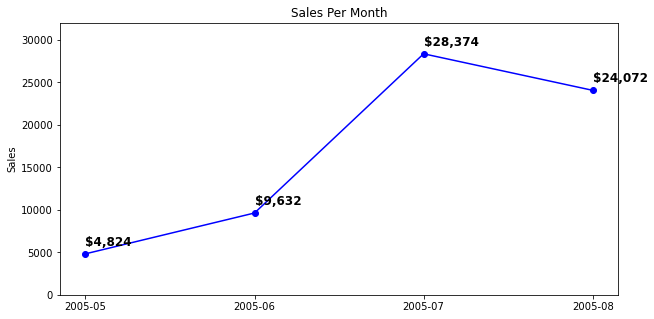

In [34]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(sales_per_month,"bo-")
ax.set_ylim(ymin = 0, ymax = 32000)
ax.set_title("Sales Per Month")
ax.set_ylabel("Sales")

for date, sales in sales_per_month["Sales"].items():
    ax.annotate(str("${:,.0f}".format(sales)),
                xy=(date, sales+1000),
               fontweight = "semibold",
               fontsize = 12)

plt.show()

In [57]:
# for visualization
sales_per_month_t = pd.read_sql("""
SELECT
    payment_date AS Date
    ,amount AS Sales
FROM payment
""", connection
)

sales_per_month_t

,Date,Sales
0,2005-05-25 11:30:37.000,2.99
1,2005-05-28 10:35:23.000,0.99
2,2005-06-15 00:54:12.000,5.99
3,2005-06-15 18:02:53.000,0.99
4,2005-06-15 21:08:46.000,9.99
...,...,...
16044,2005-08-21 17:43:42.000,4.99
16045,2005-08-21 21:41:57.000,1.99
16046,2005-08-23 06:09:44.000,8.99
16047,2005-08-23 11:08:46.000,2.99


In [58]:
sales_per_month_t.to_csv('CSV/sales_per_month_t.csv')

In [35]:
pd.read_sql("""
SELECT *
FROM store
""", connection
)

,store_id,manager_staff_id,address_id,last_update
0,1,1,1,2021-03-06 15:52:00
1,2,2,2,2021-03-06 15:52:00


In [36]:
sales_per_store = pd.read_sql("""
SELECT
    s.store_id
    ,ROUND(SUM(p.amount), 0) AS Sales
FROM payment AS p
JOIN staff AS s
ON p.staff_id = s.staff_id
GROUP BY p.staff_id

""", connection).set_index("store_id")

sales_per_store

,Sales
store_id,
1,33489.0
2,33927.0


In [37]:
sales_per_store.to_csv('CSV/sales_per_store.csv')

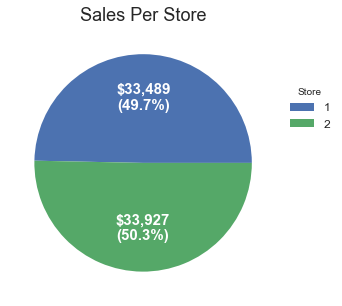

In [38]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (10,5))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "${:,.0f}\n({:.1f}%)".format(absolute, pct)

wedges, texts, autotexts = ax.pie(sales_per_store["Sales"],
       labels = sales_per_store.index,
       autopct=lambda pct: func(pct, sales_per_store["Sales"]),
       textprops=dict(color="w", fontsize = 15, fontweight = "semibold"))
ax.legend(wedges, sales_per_store.index,
          title="Store",
          fontsize = 12,
          loc="center left",
          bbox_to_anchor=(1, 0.2, 0.5, 1))
ax.set_title("Sales Per Store", fontsize = 18)
plt.rcParams['legend.title_fontsize'] = 18
plt.show()